<a href="https://colab.research.google.com/github/mukul-mschauhan/Machine-Learning-Projects/blob/master/Understanding_CNN_using_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Dataset

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.

The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset

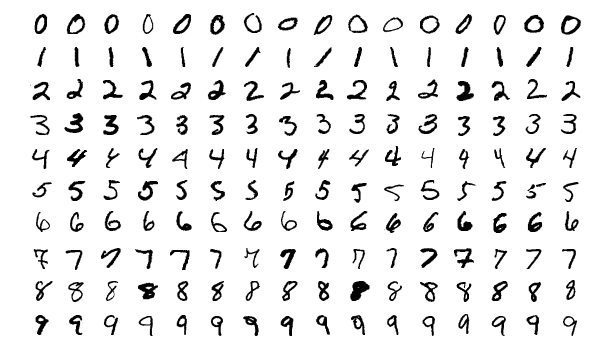

https://www.kaggle.com/competitions/digit-recognizer/overview



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O

# 2. Loading the MNIST data
MNIST is a dataset of handwritten digits (0–9).
Each image:

* is **28 x 28 pixels**
* is **grayscale** (1 color channel)
* has a label: which digit it is (0, 1, …, 9)

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [26]:
print(y_train)
print(X_train.min(), X_train.max())

[5 0 4 ... 5 6 8]
0 255


This tells us all the pixel values are in the range of **0-255**

In [8]:
# Check shape of X_train
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


# 3. Preprocessing the images
Before using CNNs, we need to prepare the data.

### a) **Reshaping to add “channel” dimension**

* Original X_train shape is usually **(num_samples, 28, 28)**.
* CNN layers expect images as **(height, width, channels)**.

Since MNIST is grayscale, channels = 1.

In [16]:
# We will reshape it as per the CNN Layers - h, w and c

Xtrain = X_train.reshape(60000, 28, 28, 1)
Xest = X_test.reshape(10000, 28, 28, 1) # Now each image is 28*28*1

### b) **Normalizing pixel values**
Pixel values are 0–255.
Neural networks work better with smaller numbers.

In [18]:
X_train_norm = Xtrain.astype("float32") / 255
X_test_norm = Xest.astype("float32") / 255

# This will bring all the pixels between 0 and 1

In [27]:
# Check if the min value is 0 and Max is 1
print(X_train_norm.min(), X_train_norm.max())

0.0 1.0


### c) **Converting labels to one‑hot vectors**
* Labels are like 0, 1, 2, ..., 9.
* For classification with softmax, we usually convert them to one-hot:

In [28]:
from keras.utils import to_categorical
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [37]:
print("Original ytrain First Row Label:", y_train[0])
print("Label After One Hot Encoding:", y_train_cat[0])

Original ytrain First Row Label: 5
Label After One Hot Encoding: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# 4. Building the CNN model

* **2D Convolution layer** → the main building block of CNNs for images.It applies **filters/kernels** that slide over the image to detect patterns like edges, curves, etc

* No of Filters applied = 32 (also called kernels or feature detectors) in this Conv2D layer.

* Each filter is a small pattern (a 3×3 weight matrix here) that scans the image.

* Each filter learns to detect one kind of feature:
  - an edge
  - a corner
  - a stroke
  - a small curve, etc.

So with 32 filters, the layer will output **32 different feature maps**, each showing **“where in the image this particular pattern appears”**.
Analogy: you have 32 different “glasses” that each highlight a specific visual pattern in the image.



In [39]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# 1st Convolution Block - Sees simple features such as edges
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2))) # Looks at 2*2 block and retains max value in that block
model.add(Dropout(0.25))

# 2nd Convolution Block - Sees shapes and extracts more deeper features.
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Full Connected Layer
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 5. Compiling the model

In [40]:
# Compiling the Model
model.compile(optimizer = "adam",
              loss = "categorical_crossentropy", metrics = ["accuracy"])

In [57]:
history = model.fit(X_train_norm, y_train_cat,
          batch_size=128,
          epochs=10,
          validation_data=(X_test_norm, y_test_cat))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 144s 305ms/step - accuracy: 0.9969 - loss: 0.0089 - val_accuracy: 0.9956 - val_loss: 0.0186
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 183s 267ms/step - accuracy: 0.9969 - loss: 0.0104 - val_accuracy: 0.9956 - val_loss: 0.0192
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 115s 245ms/step - accuracy: 0.9962 - loss: 0.0111 - val_accuracy: 0.9957 - val_loss: 0.0170
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 246ms/step - accuracy: 0.9972 - loss: 0.0093 - val_accuracy: 0.9954 - val_loss: 0.0189
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 117s 249ms/step - accuracy: 0.9969 - loss: 0.0095 - val_accuracy: 0.9953 - val_loss: 0.0193
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 249ms/step - accuracy: 0.9974 - loss: 0.0085 - val_accuracy: 0.9949 - val_loss: 0.0194
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 145s 256ms/step - accuracy: 0.9969 - loss: 0.0091 - val_accuracy: 0.9950 - val_loss: 0.0196
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 115s 244ms/step - accuracy: 0.9974 -

In [59]:
# Evaluating on the Test Set
test_loss, test_acc = model.evaluate(X_test_norm, y_test_cat)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9941 - loss: 0.0280
Test accuracy: 0.9952999949455261


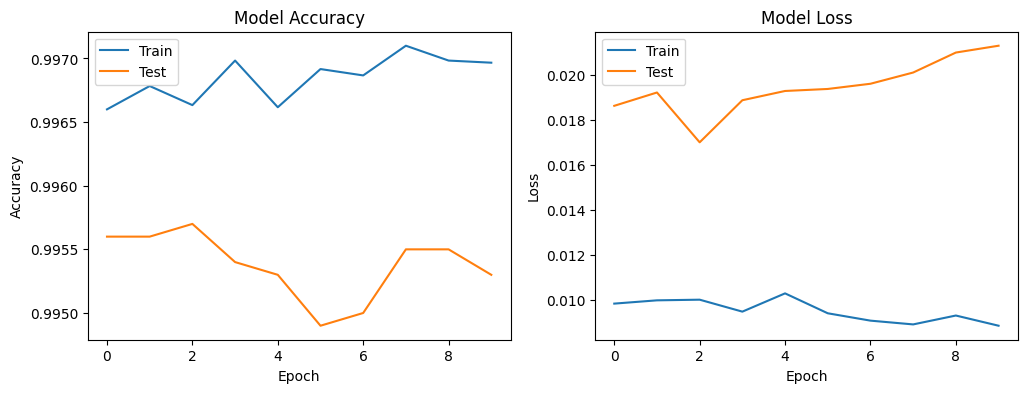

In [58]:
# Plotting Accuracy'.
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [60]:
summary = model.summary()

print(summary)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 989,888 (3.78 MB)

 Trainable params: 329,962 (1.26 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 659,926 (2.52 MB)

None


### In summary: how CNN is applied here

* Input: 28x28 grayscale images of digits.

* Conv2D + ReLU: learn local patterns (strokes, edges).

* More Conv2D + Pooling: build more abstract shapes and shrink spatial size.

* Flatten: convert spatial feature maps into a long vector.

* Dense layers: combine all features into a high-level representation.

* Softmax output: produce probabilities for digits 0–9.

* Training: use labeled digits to adjust all filter weights and connections

### Visualizing the Filters

Filters shape: (3, 3, 1, 32)


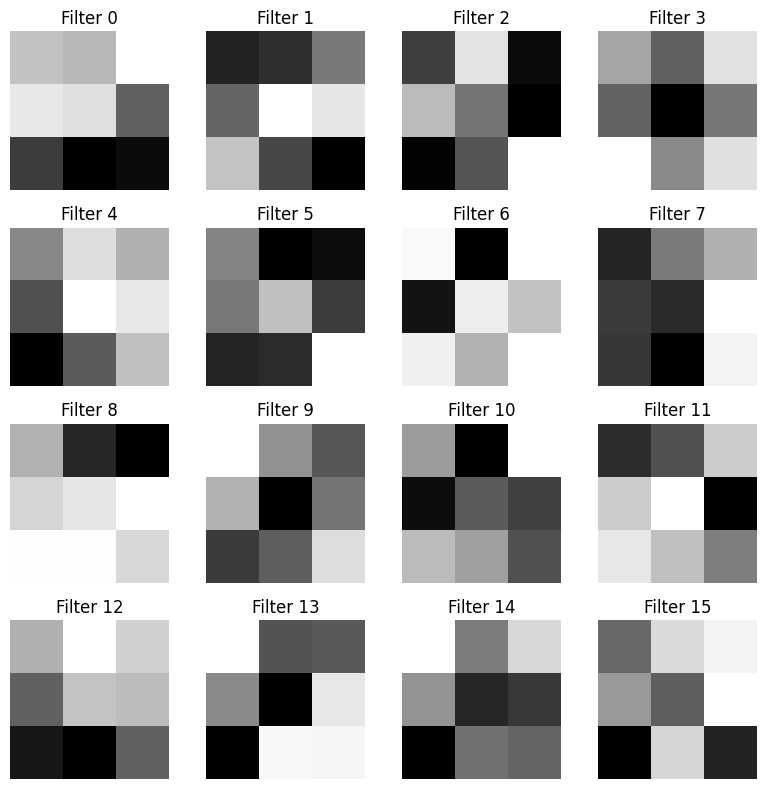

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Pick the Conv2D layer you want (e.g., first conv layer)
conv_layer = model.layers[0]  # change index if needed

# 2. Get the weights of this layer
# weights[0] = filters, weights[1] = biases
filters, biases = conv_layer.get_weights()
print("Filters shape:", filters.shape)  # (kernel_height, kernel_width, in_channels, out_channels)

# 3. Normalize filter values to 0–1 for better visualization
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min + 1e-8)

# 4. Plot the first N filters
n_filters = min(16, filters.shape[3])  # show up to 16 filters
plt.figure(figsize=(8, 8))

for i in range(n_filters):
    # Extract the i-th filter: shape (kernel_h, kernel_w, in_channels)
    f = filters[:, :, 0, i]  # 0 because MNIST has 1 input channel

    plt.subplot(4, 4, i + 1)
    plt.imshow(f, cmap='gray')
    plt.axis('off')
    plt.title(f"Filter {i}")

plt.tight_layout()
plt.show()